In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Years = ['18','19','20','21']

In [3]:
CY = '17'

In [4]:
Data = pd.read_csv('DATA{0}.csv'.format(CY))

In [5]:
Data = Data.loc[Data['YEAR BUILT']>0] #Blueberry

In [6]:
Data = Data[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE']]

In [7]:
Data = Data.loc[(Data['ZIP CODE']>=10000)&(Data['ZIP CODE']<11500)]

In [8]:
Data = Data.loc[Data['SALE PRICE']>0]

In [9]:
Data = Data.loc[Data['GROSS SQUARE FEET']>0]

In [10]:
Data = Data.groupby(by=['ZIP CODE']).sum()

In [11]:
Data

,GROSS SQUARE FEET,SALE PRICE
ZIP CODE,,
10001,319288,335566558
10002,702298,524186627
10003,740732,345397506
10004,993569,652000000
10005,2303531,1136838000
...,...,...
11432,652980,235510293
11433,551659,161351773
11434,981139,268465699


In [12]:
Data['PPSQ{0}'.format(CY)]=Data['SALE PRICE']/Data['GROSS SQUARE FEET']

In [13]:
Data.reset_index(inplace=True)
Data = Data.rename(columns = {'index':'ZIP CODE'})

In [14]:
Data = Data[['ZIP CODE','PPSQ{0}'.format(CY)]]

In [15]:
Data

,ZIP CODE,PPSQ17
0,10001,1050.983933
1,10002,746.387754
2,10003,466.292135
3,10004,656.220152
4,10005,493.519731
...,...,...
167,11432,360.669994
168,11433,292.484620
169,11434,273.626570
170,11435,317.007864


In [16]:
FinData = Data

In [17]:
for year in Years:
    Data = pd.read_csv('DATA{0}.csv'.format(year))
    Data = Data.loc[Data['YEAR BUILT']>0] #Blueberry
    Data = Data[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE']]
    Data = Data.loc[(Data['ZIP CODE']>=10000)&(Data['ZIP CODE']<11500)]
    Data = Data.loc[Data['SALE PRICE']>0]
    Data = Data.loc[Data['GROSS SQUARE FEET']>0]
    Data = Data.groupby(by=['ZIP CODE']).sum()
    Data['PPSQ{0}'.format(year)]=Data['SALE PRICE']/Data['GROSS SQUARE FEET']
    Data.reset_index(inplace=True)
    Data = Data.rename(columns = {'index':'ZIP CODE'})
    Data = Data[['ZIP CODE','PPSQ{0}'.format(year)]]
    FinData = FinData.merge(Data, left_on='ZIP CODE', right_on='ZIP CODE')

In [18]:
FinData

,ZIP CODE,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21
0,10001,1050.983933,736.260914,486.913853,710.073505,623.336857
1,10002,746.387754,1251.947092,518.364589,659.132917,816.708254
2,10003,466.292135,1084.151158,628.610161,1173.363406,1134.362144
3,10007,1449.987209,706.431738,258.917370,358.905300,1453.698382
4,10009,1001.538402,869.148055,368.144322,10.501940,728.660589
...,...,...,...,...,...,...
162,11432,360.669994,397.323131,368.577922,397.409262,485.386658
163,11433,292.484620,325.525703,316.061649,282.657708,376.527722
164,11434,273.626570,322.311031,582.748498,342.323661,396.171005
165,11435,317.007864,355.100343,334.841572,142.758490,448.396448


In [19]:
FinData['CHANGE 17-18']=((FinData['PPSQ18']-FinData['PPSQ17'])/FinData['PPSQ17'])*100

In [20]:
FinData['CHANGE 18-19']=((FinData['PPSQ19']-FinData['PPSQ18'])/FinData['PPSQ18'])*100

In [21]:
FinData

,ZIP CODE,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 17-18,CHANGE 18-19
0,10001,1050.983933,736.260914,486.913853,710.073505,623.336857,-29.945560,-33.866671
1,10002,746.387754,1251.947092,518.364589,659.132917,816.708254,67.734142,-58.595328
2,10003,466.292135,1084.151158,628.610161,1173.363406,1134.362144,132.504706,-42.018218
3,10007,1449.987209,706.431738,258.917370,358.905300,1453.698382,-51.280140,-63.348565
4,10009,1001.538402,869.148055,368.144322,10.501940,728.660589,-13.218699,-57.643083
...,...,...,...,...,...,...,...,...
162,11432,360.669994,397.323131,368.577922,397.409262,485.386658,10.162513,-7.234718
163,11433,292.484620,325.525703,316.061649,282.657708,376.527722,11.296691,-2.907314
164,11434,273.626570,322.311031,582.748498,342.323661,396.171005,17.792300,80.803150
165,11435,317.007864,355.100343,334.841572,142.758490,448.396448,12.016257,-5.705084


In [22]:
FinData['CHANGE 19-20']=((FinData['PPSQ20']-FinData['PPSQ19'])/FinData['PPSQ19'])*100

In [23]:
FinData['CHANGE 20-21']=((FinData['PPSQ21']-FinData['PPSQ20'])/FinData['PPSQ20'])*100

In [24]:
FinData

,ZIP CODE,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 17-18,CHANGE 18-19,CHANGE 19-20,CHANGE 20-21
0,10001,1050.983933,736.260914,486.913853,710.073505,623.336857,-29.945560,-33.866671,45.831444,-12.215165
1,10002,746.387754,1251.947092,518.364589,659.132917,816.708254,67.734142,-58.595328,27.156239,23.906458
2,10003,466.292135,1084.151158,628.610161,1173.363406,1134.362144,132.504706,-42.018218,86.659949,-3.323886
3,10007,1449.987209,706.431738,258.917370,358.905300,1453.698382,-51.280140,-63.348565,38.617699,305.036756
4,10009,1001.538402,869.148055,368.144322,10.501940,728.660589,-13.218699,-57.643083,-97.147331,6838.342679
...,...,...,...,...,...,...,...,...,...,...
162,11432,360.669994,397.323131,368.577922,397.409262,485.386658,10.162513,-7.234718,7.822319,22.137732
163,11433,292.484620,325.525703,316.061649,282.657708,376.527722,11.296691,-2.907314,-10.568805,33.209784
164,11434,273.626570,322.311031,582.748498,342.323661,396.171005,17.792300,80.803150,-41.257050,15.729951
165,11435,317.007864,355.100343,334.841572,142.758490,448.396448,12.016257,-5.705084,-57.365362,214.094417


In [25]:
CoolData = FinData

In [26]:
cols = ['PPSQ17','PPSQ18', 'PPSQ19', 'PPSQ20', 'PPSQ21', 'CHANGE 17-18','CHANGE 18-19','CHANGE 19-20', 'CHANGE 20-21']

In [27]:
for col in cols:
    CoolData['{0}_norm'.format(col)]= (CoolData['{0}'.format(col)] - CoolData['{0}'.format(col)].min()) / (CoolData['{0}'.format(col)].max() - CoolData['{0}'.format(col)].min())

In [28]:
CoolData

,ZIP CODE,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 17-18,CHANGE 18-19,CHANGE 19-20,CHANGE 20-21,PPSQ17_norm,PPSQ18_norm,PPSQ19_norm,PPSQ20_norm,PPSQ21_norm,CHANGE 17-18_norm,CHANGE 18-19_norm,CHANGE 19-20_norm,CHANGE 20-21_norm
0,10001,1050.983933,736.260914,486.913853,710.073505,623.336857,-29.945560,-33.866671,45.831444,-12.215165,0.553353,0.251149,0.269448,0.391048,0.264133,0.007813,0.267392,0.242586,0.008869
1,10002,746.387754,1251.947092,518.364589,659.132917,816.708254,67.734142,-58.595328,27.156239,23.906458,0.388069,0.460278,0.287650,0.362876,0.348697,0.036022,0.157930,0.210900,0.014095
2,10003,466.292135,1084.151158,628.610161,1173.363406,1134.362144,132.504706,-42.018218,86.659949,-3.323886,0.236080,0.392230,0.351453,0.647265,0.487612,0.054726,0.231309,0.311858,0.010155
3,10007,1449.987209,706.431738,258.917370,358.905300,1453.698382,-51.280140,-63.348565,38.617699,305.036756,0.769866,0.239052,0.137499,0.196838,0.627262,0.001652,0.136889,0.230346,0.054768
4,10009,1001.538402,869.148055,368.144322,10.501940,728.660589,-13.218699,-57.643083,-97.147331,6838.342679,0.526522,0.305039,0.200712,0.004158,0.310193,0.012644,0.162145,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,11432,360.669994,397.323131,368.577922,397.409262,485.386658,10.162513,-7.234718,7.822319,22.137732,0.178766,0.113697,0.200963,0.218132,0.203805,0.019396,0.385279,0.178097,0.013839
163,11433,292.484620,325.525703,316.061649,282.657708,376.527722,11.296691,-2.907314,-10.568805,33.209784,0.141766,0.084581,0.170570,0.154670,0.156200,0.019723,0.404434,0.146894,0.015441
164,11434,273.626570,322.311031,582.748498,342.323661,396.171005,17.792300,80.803150,-41.257050,15.729951,0.131533,0.083277,0.324911,0.187668,0.164790,0.021599,0.774981,0.094827,0.012912
165,11435,317.007864,355.100343,334.841572,142.758490,448.396448,12.016257,-5.705084,-57.365362,214.094417,0.155074,0.096575,0.181439,0.077301,0.187629,0.019931,0.392050,0.067496,0.041611


In [29]:
import geopandas as gpd

In [30]:
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")

In [31]:
NYCzip.head() #geopandas looks pretty much like pandas dataframe including both - labels/parameters and geometry - of the shapes

,zipcode,geometry
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89..."
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70..."
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70..."
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72..."
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81..."


In [32]:
NYCzip = NYCzip.loc[(NYCzip['zipcode']>=10000)&(NYCzip['zipcode']<11500)]

<AxesSubplot: >

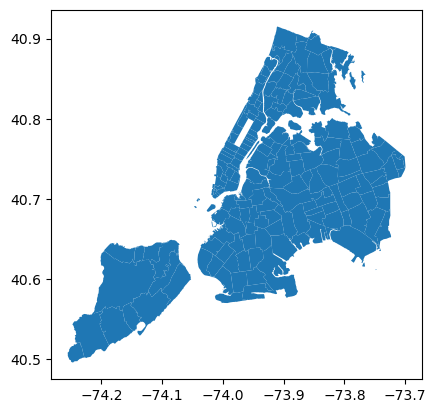

In [33]:
NYCzip.plot()

In [34]:
NYCzip.count

<bound method DataFrame.count of      zipcode                                           geometry
0    11372.0  POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...
1    11004.0  POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...
2    11040.0  POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...
3    11426.0  POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...
4    11365.0  POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...
..       ...                                                ...
257  10065.0  POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...
258  10075.0  POLYGON Z ((-73.94908 40.76828 0.00000, -73.95...
259  10069.0  POLYGON Z ((-73.98821 40.78123 0.00000, -73.98...
260  10281.0  POLYGON Z ((-74.01468 40.70980 0.00000, -74.01...
261  10282.0  POLYGON Z ((-74.01323 40.71832 0.00000, -74.01...

[253 rows x 2 columns]>

In [35]:
Result = NYCzip.merge(FinData,left_on='zipcode',right_on='ZIP CODE')

In [36]:
Result

,zipcode,geometry,ZIP CODE,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 17-18,CHANGE 18-19,...,CHANGE 20-21,PPSQ17_norm,PPSQ18_norm,PPSQ19_norm,PPSQ20_norm,PPSQ21_norm,CHANGE 17-18_norm,CHANGE 18-19_norm,CHANGE 19-20_norm,CHANGE 20-21_norm
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372,133.870713,650.638953,438.136469,611.051843,390.741273,386.020385,-32.660584,...,-36.054317,0.055697,0.216426,0.241219,0.336285,0.162416,0.127938,0.272730,0.231786,0.005420
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004,466.018102,464.340028,515.643368,519.204547,535.543210,-0.360088,11.048658,...,3.146864,0.235931,0.140875,0.286075,0.285490,0.225740,0.016357,0.466211,0.165997,0.011091
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040,470.209240,518.006233,490.344911,524.646634,567.703006,10.165048,-5.339959,...,8.206738,0.238206,0.162639,0.271434,0.288500,0.239804,0.019397,0.393666,0.176694,0.011823
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426,403.834177,436.558998,442.076808,482.950316,501.973804,8.103530,1.263932,...,3.939016,0.202188,0.129609,0.243500,0.265440,0.211059,0.018801,0.422898,0.180512,0.011206
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365,502.567144,552.196408,554.195526,533.917156,572.057408,9.875151,0.362030,...,7.143478,0.255764,0.176504,0.308387,0.293626,0.241708,0.019313,0.418906,0.158617,0.011669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,10307.0,"POLYGON Z ((-74.24967 40.51555 0.00000, -74.24...",10307,270.584399,306.199700,307.525960,317.014918,319.724623,13.162363,0.433136,...,0.854756,0.129883,0.076744,0.165630,0.173671,0.131359,0.020262,0.419221,0.170061,0.010760
168,10019.0,"POLYGON Z ((-73.99310 40.77273 0.00000, -73.98...",10019,416.733783,1268.116928,285.677659,291.858127,614.108646,204.299047,-77.472294,...,110.413413,0.209188,0.466835,0.152986,0.159759,0.260097,0.075460,0.074370,0.168496,0.026610
169,10022.0,"POLYGON Z ((-73.97255 40.76490 0.00000, -73.96...",10022,1414.129830,1221.975771,999.835493,93.932870,285.909192,-13.588148,-18.178779,...,204.376086,0.750408,0.448123,0.566294,0.050298,0.116571,0.012537,0.336835,0.011100,0.040205
170,10065.0,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...",10065,1231.270637,1974.012320,347.805724,551.130569,519.128562,60.323187,-82.380772,...,-5.806611,0.651183,0.753100,0.188942,0.303146,0.218561,0.033882,0.052643,0.264011,0.009796


In [37]:
#Result.plot(figsize = (10,10), column='CHANGE 20-21 (%)', legend=False)

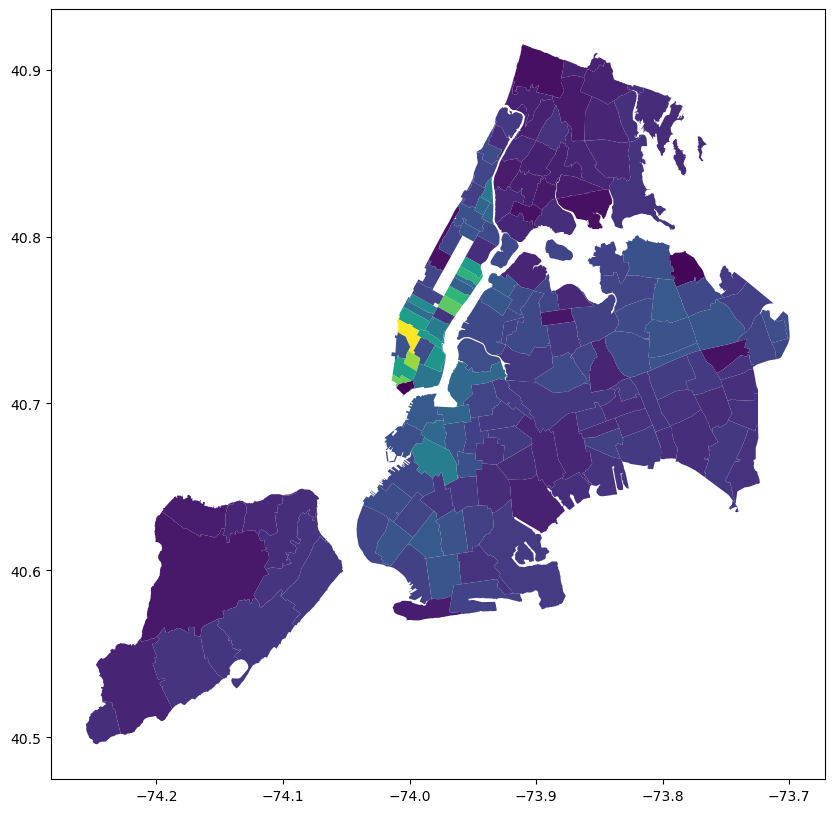

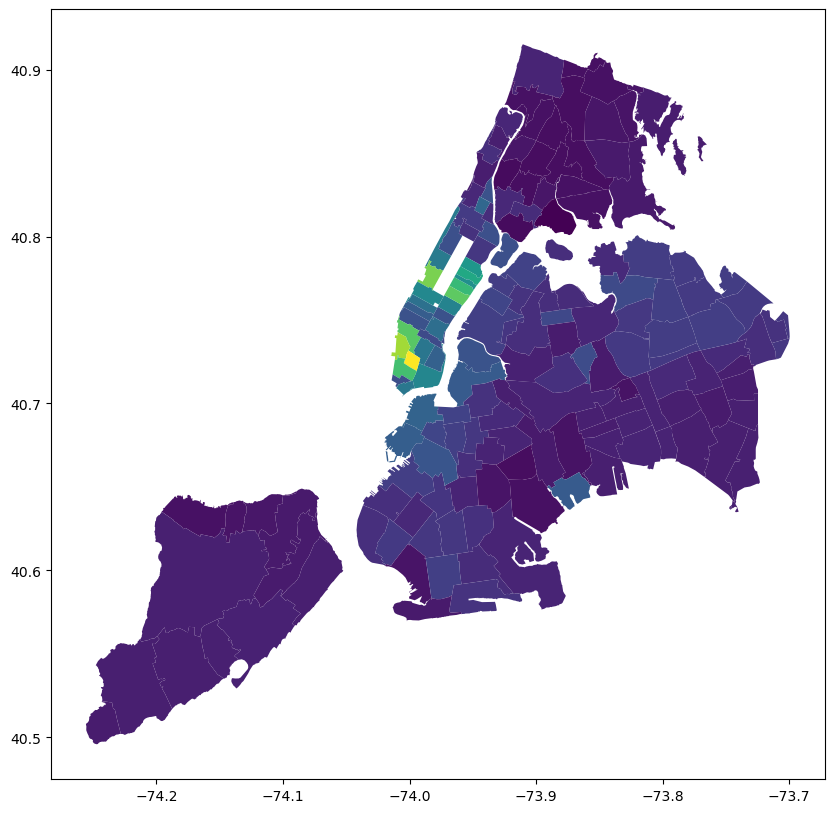

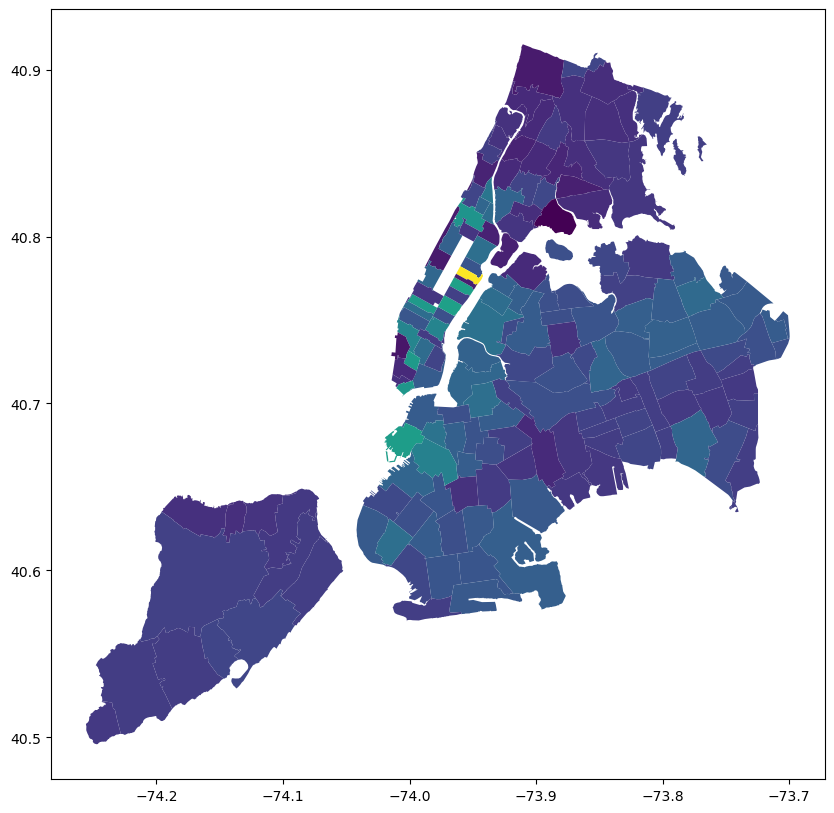

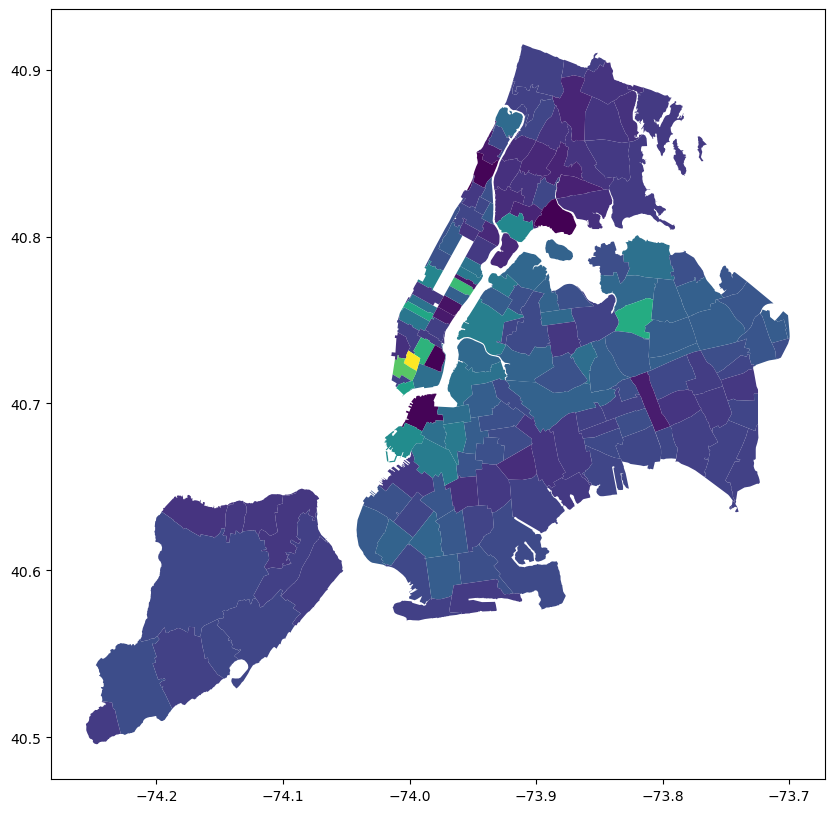

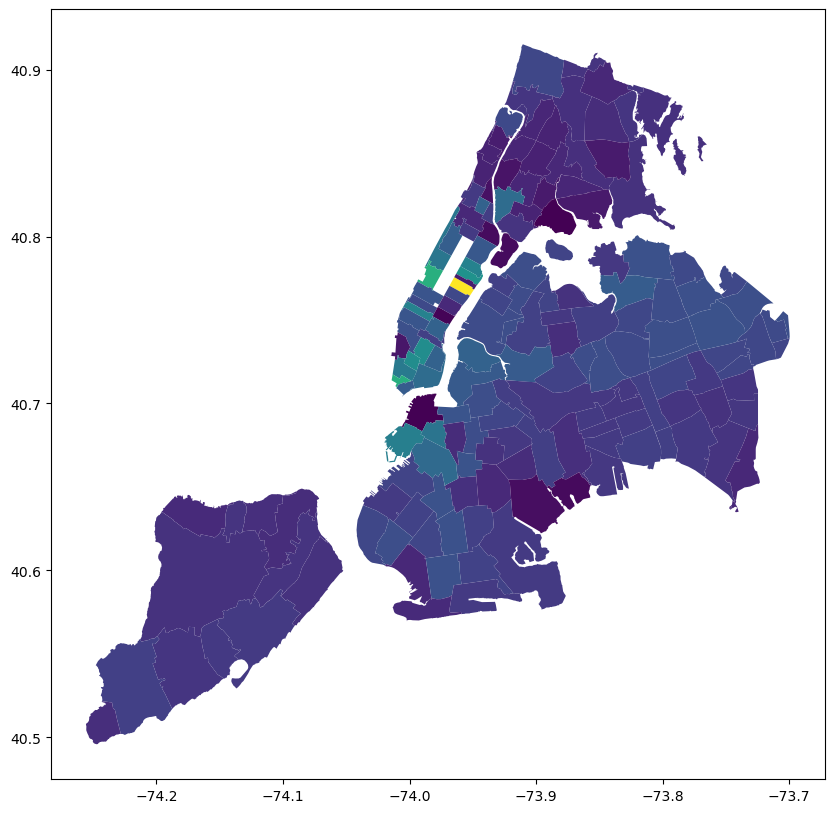

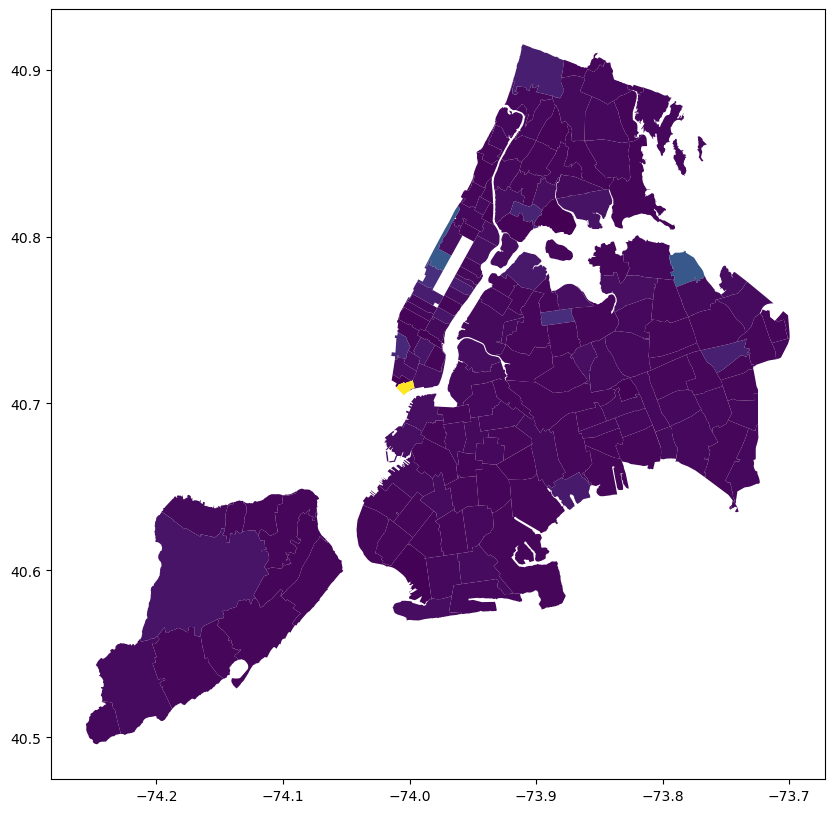

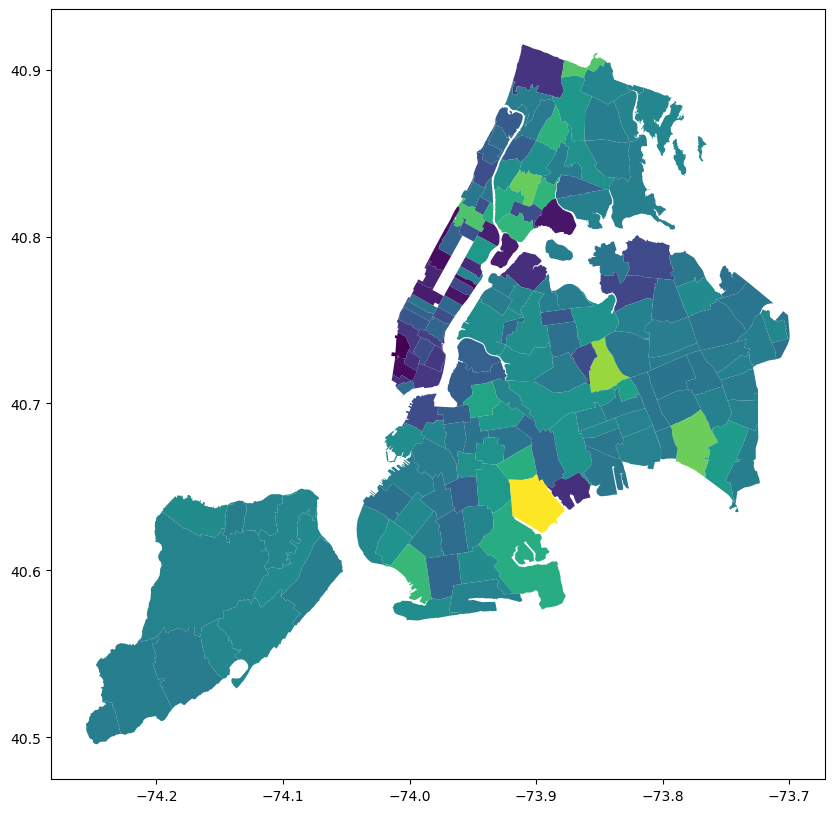

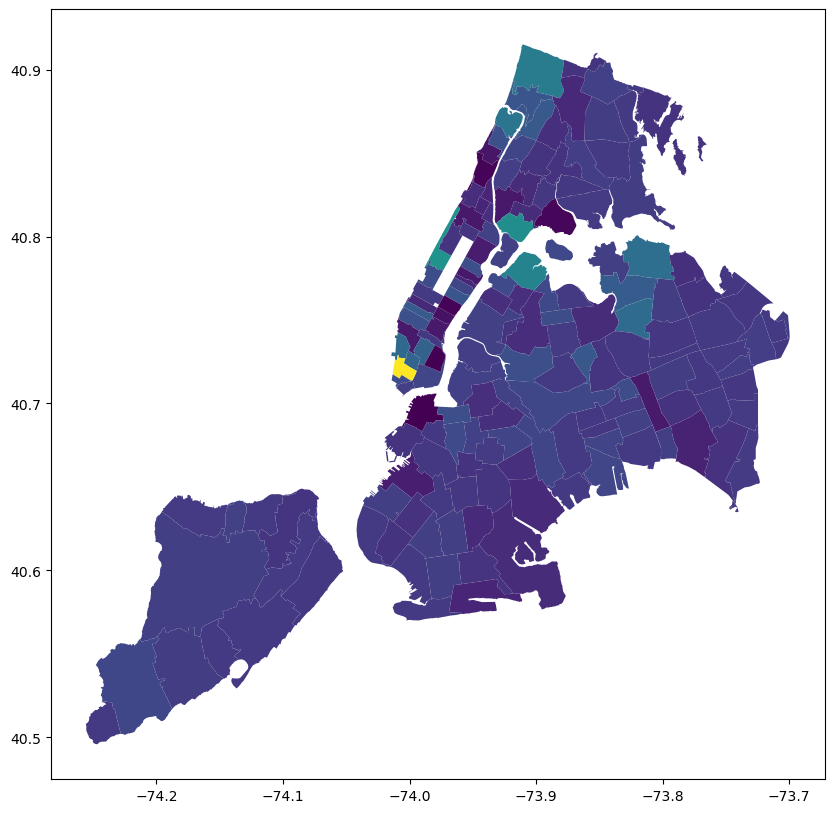

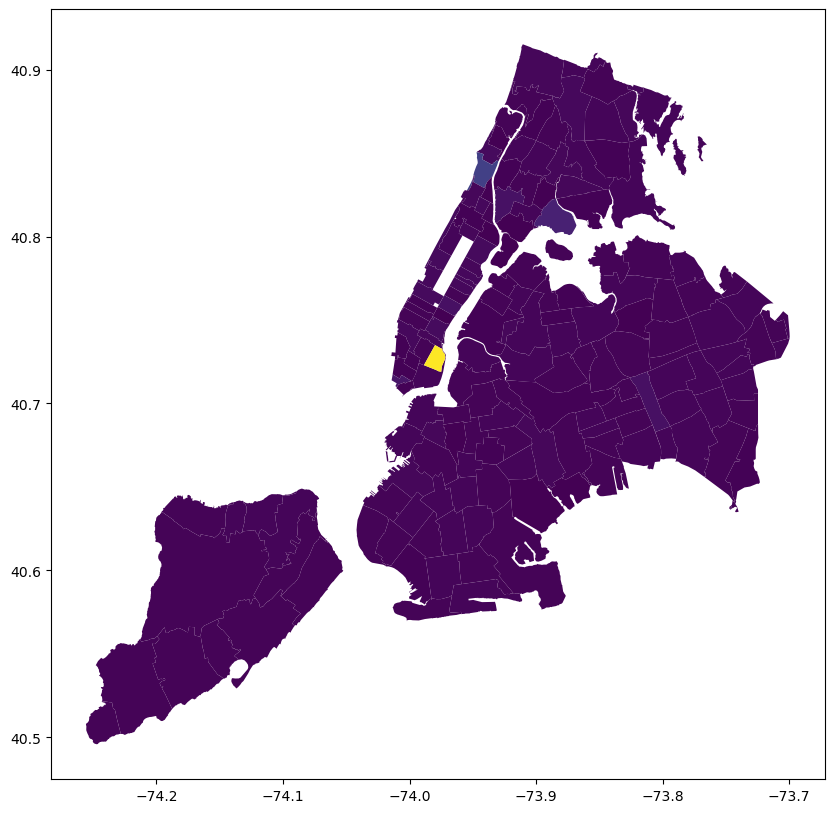

In [38]:
# Time to Visualize Columns:
for col in cols:
    Result.plot(figsize = (10,10), column='{0}_norm'.format(col), legend=False)